In [2]:
## Load the Helsinki bicycle data set 
## The dataset contains the number of cyclists passing by measuring points per hour. 
## The data is gathered over about four years, and there are 20 measuring points around Helsinki
## clean the data set of columns/rows that contain only missing values
## Merge the processed cycling data set (from the previous exercise) and weather data set along the columns year, month, and day



In [90]:
import pandas as pd
import numpy as np

cycling_df = pd.read_csv('Helsingin_pyorailijamaarat.csv', delimiter=';')
cycling_df.head()

,Päivämäärä,Auroransilta,Eteläesplanadi,Huopalahti (asema),Kaisaniemi/Eläintarhanlahti,Kaivokatu,Kulosaaren silta et.,Kulosaaren silta po.,Kuusisaarentie,"Käpylä, Pohjoisbaana",...,Munkkiniemen silta eteläpuoli,Munkkiniemi silta pohjoispuoli,Heperian puisto/Ooppera,Pitkäsilta itäpuoli,Pitkäsilta länsipuoli,Lauttasaaren silta pohjoispuoli,Ratapihantie,Viikintie,Baana,Unnamed: 21
0,ke 1 tammi 2014 00:00,NaN,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,2.0,5.0,3.0,NaN,11.0,NaN,NaN,NaN,8.0,NaN
1,ke 1 tammi 2014 01:00,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,6.0,5.0,1.0,NaN,8.0,NaN,NaN,NaN,4.0,NaN
2,ke 1 tammi 2014 02:00,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,14.0,NaN,NaN,NaN,11.0,NaN
3,ke 1 tammi 2014 03:00,NaN,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,0.0,2.0,0.0,NaN,7.0,NaN,NaN,NaN,3.0,NaN
4,ke 1 tammi 2014 04:00,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,NaN,9.0,NaN,NaN,NaN,4.0,NaN


In [94]:
def cyclists_per_day():
    
    # Drop empty rows and columns
    cycling_df.dropna(how='all', inplace=True)
    cycling_df.dropna(axis=1, how='all', inplace=True)

    # Split the 'Päivämäärä' column into separate components
    date_split = cycling_df['Päivämäärä'].str.split(' ', expand=True)
    date_split.columns = ['Weekday', 'Day', 'Month', 'Year', 'Time']
    
    # Map Finnish month names to numerical values
    month_map = {
        'tammi': 1, 'helmi': 2, 'maalis': 3, 
        'huhti': 4, 'touko': 5, 'kesä': 6, 
        'heinä': 7, 'elo': 8, 'syys': 9, 
        'loka': 10, 'marras': 11, 'joulu': 12
    }
    
    date_split['Month'] = date_split['Month'].map(month_map)
    date_split['Year'] = date_split['Year'].astype(int)  # Ensure Year is an integer
    date_split['Day'] = date_split['Day'].astype(int)    # Ensure Day is an integer

    # Combine the new date DataFrame with the original DataFrame
    cycling_df = pd.concat([cycling_df, date_split[['Day', 'Month', 'Year']]], axis=1)

    # Drop the original 'Päivämäärä' column
    cycling_df.drop(columns=['Päivämäärä'], inplace=True)

    # Group by Year, Month, and Day and sum the cyclist counts
    # Assuming the cyclist counts are in a column named 'Count'
    daily_counts = cycling_df.groupby(['Year', 'Month', 'Day']).sum(numeric_only=True).reset_index()
    
    # Drop unnecessary columns (assuming 'Hour' and 'Weekday' exist)
    daily_counts.drop(columns=['Hour', 'Weekday'], errors='ignore', inplace=True)
    return daily_counts

In [68]:
daily_counts = cyclists_per_day()
daily_counts.head()

,Year,Month,Day,Auroransilta,Eteläesplanadi,Huopalahti (asema),Kaisaniemi/Eläintarhanlahti,Kaivokatu,Kulosaaren silta et.,Kulosaaren silta po.,...,Merikannontie,Munkkiniemen silta eteläpuoli,Munkkiniemi silta pohjoispuoli,Heperian puisto/Ooppera,Pitkäsilta itäpuoli,Pitkäsilta länsipuoli,Lauttasaaren silta pohjoispuoli,Ratapihantie,Viikintie,Baana
0,2014,1,1,0.0,129.0,0.0,113.0,0.0,0.0,0.0,...,0.0,123.0,195.0,96.0,0.0,182.0,0.0,0.0,0.0,289.0
1,2014,1,2,0.0,526.0,0.0,504.0,0.0,0.0,0.0,...,0.0,387.0,378.0,290.0,0.0,371.0,0.0,0.0,0.0,921.0
2,2014,1,3,0.0,546.0,0.0,512.0,0.0,0.0,0.0,...,0.0,406.0,367.0,314.0,0.0,389.0,0.0,0.0,0.0,912.0
3,2014,1,4,0.0,259.0,0.0,258.0,0.0,0.0,0.0,...,0.0,174.0,160.0,190.0,0.0,280.0,0.0,0.0,0.0,422.0
4,2014,1,5,0.0,230.0,0.0,243.0,0.0,0.0,0.0,...,0.0,235.0,250.0,183.0,0.0,262.0,0.0,0.0,0.0,497.0


C:\Users\HOME\AppData\Local\Temp\ipykernel_240568\847453911.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  august_2017['Total'] = august_2017.iloc[:, 3:].sum(axis=1)  # Create Total column


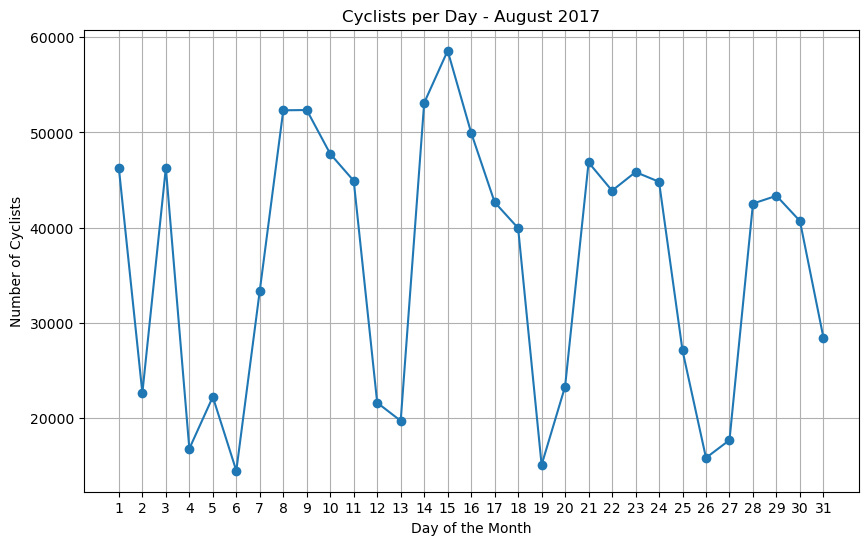

In [64]:
# Filter for August 2017
august_2017 = daily_counts[(daily_counts['Year'] == 2017) & (daily_counts['Month'] == 8)]
    
# Set the index to Year, Month, Day for easier plotting
august_2017.set_index(['Year', 'Month', 'Day'], inplace=True)

# Ensure that all cyclist count columns are summed correctly
count_columns = august_2017.columns[3:]  

# Adjust index if your counts start at a different column
august_2017['Total'] = august_2017.iloc[:, 3:].sum(axis=1)  # Create Total column
    
# Check if the 'Total' column was created successfully
plt.figure(figsize=(10, 6))
plt.plot(august_2017.index.get_level_values('Day'), august_2017['Total'], marker='o')

# Set x-ticks and labels
plt.xticks(range(1, 32))  # Days from 1 to 31
plt.title('Cyclists per Day - August 2017')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Cyclists')
plt.grid()
plt.show()



In [74]:
def bicycle_timeseries():
    cycling_df = pd.read_csv('Helsingin_pyorailijamaarat.csv', delimiter=';')
    
    # Drop empty rows and columns
    cycling_df.dropna(how='all', inplace=True)
    cycling_df.dropna(axis=1, how='all', inplace=True)

    # Split the 'Päivämäärä' column into separate components
    date_split = cycling_df['Päivämäärä'].str.split(' ', expand=True)
    date_split.columns = ['Weekday', 'Day', 'Month', 'Year', 'Time']
    
    # Map Finnish month names to numerical values
    month_map = {
        'tammi': 1, 'helmi': 2, 'maalis': 3, 
        'huhti': 4, 'touko': 5, 'kesä': 6, 
        'heinä': 7, 'elo': 8, 'syys': 9, 
        'loka': 10, 'marras': 11, 'joulu': 12
    }
    
    # Convert month names to numbers and ensure Day and Year are integers
    date_split['Month'] = date_split['Month'].map(month_map)
    date_split['Year'] = date_split['Year'].astype(int)
    date_split['Day'] = date_split['Day'].astype(int)

    # Combine the new date DataFrame with the original DataFrame
    cycling_df = pd.concat([cycling_df, date_split[['Weekday', 'Day', 'Month', 'Year', 'Time']]], axis=1)

    # Drop the original 'Päivämäärä' column
    cycling_df.drop(columns=['Päivämäärä'], inplace=True)

    # Create a DateTime column from the relevant columns
    cycling_df['Date'] = pd.to_datetime(cycling_df[['Year', 'Month', 'Day']].astype(str).agg('-'.join, axis=1) + ' ' + cycling_df['Time'])

    # Set the new 'Date' column as index
    cycling_df.set_index('Date', inplace=True)  
    
    # Optionally, drop the now redundant 'Weekday', 'Year', 'Month', 'Day', 'Time' columns if not needed
    cycling_df.drop(columns=['Weekday', 'Year', 'Month', 'Day', 'Time'], inplace=True)

    return cycling_df

In [76]:
cycling_df = bicycle_timeseries()
cycling_df.head()

,Auroransilta,Eteläesplanadi,Huopalahti (asema),Kaisaniemi/Eläintarhanlahti,Kaivokatu,Kulosaaren silta et.,Kulosaaren silta po.,Kuusisaarentie,"Käpylä, Pohjoisbaana",Lauttasaaren silta eteläpuoli,Merikannontie,Munkkiniemen silta eteläpuoli,Munkkiniemi silta pohjoispuoli,Heperian puisto/Ooppera,Pitkäsilta itäpuoli,Pitkäsilta länsipuoli,Lauttasaaren silta pohjoispuoli,Ratapihantie,Viikintie,Baana
Date,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,NaN,7.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,5.0,3.0,NaN,11.0,NaN,NaN,NaN,8.0
2014-01-01 01:00:00,NaN,5.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,5.0,1.0,NaN,8.0,NaN,NaN,NaN,4.0
2014-01-01 02:00:00,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,14.0,NaN,NaN,NaN,11.0
2014-01-01 03:00:00,NaN,5.0,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,NaN,7.0,NaN,NaN,NaN,3.0
2014-01-01 04:00:00,NaN,1.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,9.0,NaN,NaN,NaN,4.0


In [56]:
def commute():
    cycling_df = bicycle_timeseries()
    # Filter for August 2017
    cycling_df = cycling_df[(cycling_df.index.year == 2017) & (cycling_df.index.month == 8)]

    # Create a 'Weekday' column (1=Monday, ..., 7=Sunday)
    cycling_df['Weekday'] = cycling_df.index.dayofweek + 1  # Convert to 1-7

    # Group by 'Weekday' and sum the counts
    weekday_counts = cycling_df.groupby('Weekday').sum(numeric_only=True)

    # Set 'Weekday' as index
    weekday_counts.index.name = 'Weekday'
    
    return weekday_counts


In [80]:
weekday_counts = commute()
weekday_counts.head(7)

,Auroransilta,Eteläesplanadi,Huopalahti (asema),Kaisaniemi/Eläintarhanlahti,Kaivokatu,Kulosaaren silta et.,Kulosaaren silta po.,Kuusisaarentie,"Käpylä, Pohjoisbaana",Lauttasaaren silta eteläpuoli,Merikannontie,Munkkiniemen silta eteläpuoli,Munkkiniemi silta pohjoispuoli,Heperian puisto/Ooppera,Pitkäsilta itäpuoli,Pitkäsilta länsipuoli,Lauttasaaren silta pohjoispuoli,Ratapihantie,Viikintie,Baana
Weekday,,,,,,,,,,,,,,,,,,,,
1,0.0,11353.0,11083.0,10644.0,0.0,7.0,13879.0,10052.0,0.0,21337.0,16870.0,4820.0,10551.0,25439.0,15555.0,7057.0,7646.0,9256.0,0.0,22768.0
2,0.0,16529.0,15415.0,14636.0,0.0,8.0,19296.0,13278.0,0.0,29983.0,24101.0,6365.0,14569.0,36458.0,21440.0,10181.0,10269.0,13186.0,0.0,30598.0
3,0.0,14890.0,12509.0,12734.0,0.0,6.0,16576.0,11496.0,0.0,25836.0,19946.0,5156.0,12626.0,31469.0,19019.0,9306.0,8772.0,11138.0,0.0,27437.0
4,0.0,15630.0,11729.0,12478.0,0.0,10.0,15911.0,10600.0,0.0,25800.0,20272.0,5123.0,12284.0,31364.0,19616.0,9875.0,8556.0,10605.0,0.0,27489.0
5,0.0,10155.0,7043.0,7626.0,0.0,3.0,9913.0,6543.0,0.0,16057.0,11879.0,3071.0,7576.0,18573.0,12271.0,6678.0,5158.0,6462.0,0.0,16972.0
6,0.0,6547.0,2754.0,4004.0,0.0,6.0,6108.0,2912.0,0.0,9949.0,7080.0,1425.0,4259.0,11022.0,7944.0,5439.0,3422.0,2697.0,0.0,8523.0
7,0.0,5628.0,2789.0,3757.0,0.0,14.0,5909.0,4037.0,0.0,10854.0,8001.0,1724.0,4165.0,11018.0,7017.0,4592.0,2699.0,2284.0,0.0,9160.0


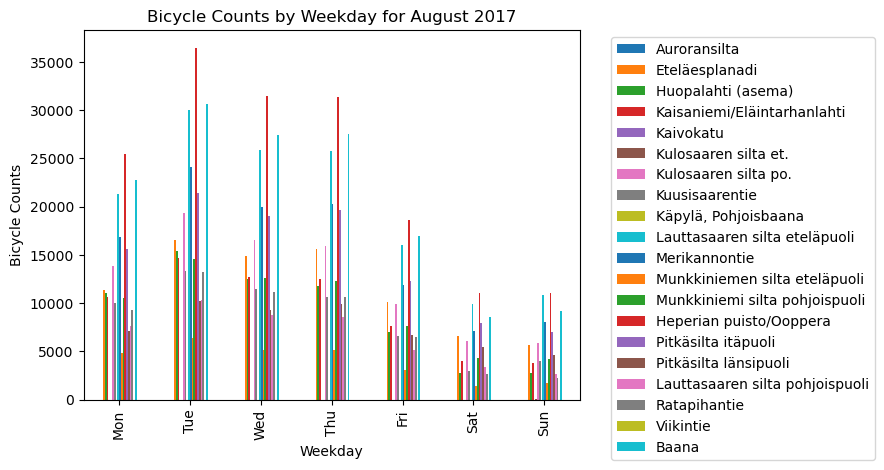

In [72]:
# Plot the DataFrame
weekday_counts.plot(kind='bar')
    
# Set x-tick labels to weekdays
plt.xticks(ticks=range(7), labels=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
    
# Show the plot
plt.xlabel('Weekday')
plt.ylabel('Bicycle Counts')
plt.title('Bicycle Counts by Weekday for August 2017')

# Move the legend outside the plot to the right
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()
